<a href="https://colab.research.google.com/github/mashdas/Deep_Learning_101/blob/master/bc_detect.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve,auc

In [0]:
df = pd.read_csv(
    "https://data.heatonresearch.com/data/t81-558/wcbreast_wdbc.csv",
    na_values=['NA','?'])


In [0]:
# X=df.iloc[:,2:].values

In [0]:
x_columns = df.columns.drop('diagnosis').drop('id')
for col in x_columns:
    df[col] = zscore(df[col])

# Convert to numpy - Regression
X = df[x_columns].values

In [0]:
y=df["diagnosis"].map({'M':0,"B":1})
y=y.values
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [0]:

# X_columns=df.columns.drop(['diagnosis','id',"Unnamed: 32"])

In [0]:
# from scipy.stats import zcore

# for x in X_columns:
#   df[x]=zscore(df[x])
# X=df[X_columns].values  

In [0]:
X

array([[ 1.09706398, -2.07333501,  1.26993369, ...,  2.29607613,
         2.75062224,  1.93701461],
       [ 1.82982061, -0.35363241,  1.68595471, ...,  1.0870843 ,
        -0.24388967,  0.28118999],
       [ 1.57988811,  0.45618695,  1.56650313, ...,  1.95500035,
         1.152255  ,  0.20139121],
       ...,
       [ 0.70228425,  2.0455738 ,  0.67267578, ...,  0.41406869,
        -1.10454895, -0.31840916],
       [ 1.83834103,  2.33645719,  1.98252415, ...,  2.28998549,
         1.91908301,  2.21963528],
       [-1.80840125,  1.22179204, -1.81438851, ..., -1.74506282,
        -0.04813821, -0.75120669]])

In [0]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42,test_size=0.25)


In [0]:
# from sklearn.preprocessing import StandardScaler

# sc=StandardScaler()
# X_train=sc.fit_transform(X_train)
# X_test=sc.transform(X_test)

In [0]:

##Building ze model
X_test

array([[-0.47069438, -0.16048584, -0.44810956, ..., -0.19956318,
         0.18320441,  0.19695794],
       [ 1.36687747,  0.47014935,  1.30288585, ...,  0.97897545,
        -0.56582801, -1.00057787],
       [ 0.37850807,  0.04429607,  0.40082046, ...,  0.56024403,
        -0.10314275, -0.20813168],
       ...,
       [-0.87683468, -0.57237672, -0.8670139 , ..., -0.61357437,
         0.15731992, -0.28460551],
       [ 1.61396982,  0.66562299,  1.56650313, ...,  1.89104864,
        -0.21476962, -0.43201158],
       [-1.09836575, -1.64515466, -1.07996724, ..., -0.72548986,
         0.05863531, -0.37271666]])

In [175]:
import tensorflow.keras
from tensorflow.keras.models  import Sequential
from tensorflow.keras.layers import Dense,Activation,BatchNormalization,Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ModelCheckpoint


model=Sequential()
model.add(Dense(100,input_dim=X_train.shape[1],activation="relu",kernel_initializer='random_normal'))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(50,activation="relu",kernel_initializer="random_normal"))
model.add(BatchNormalization())
model.add(Dropout(0.3))
model.add(Dense(25,activation="relu",kernel_initializer="random_normal"))
model.add(BatchNormalization())
model.add(Dropout(0.3))
model.add(Dense(1,activation="linear",kernel_initializer="random_normal"))
model.compile(loss="binary_crossentropy",optimizer="adam",metrics=["accuracy"])

monitor=EarlyStopping(monitor="val_loss",min_delta=1e-3,patience=5,verbose=1,mode='auto', restore_best_weights=True)
##checkpointer=ModelCheckpoint(filepath="best_weights.hdf5",verbose=0,save_best_weights=True)

history=model.fit(X_train,y_train,validation_data=(X_test,y_test),
          callbacks=[monitor],verbose=2,epochs=50)

Epoch 1/50
14/14 - 0s - loss: 4.5081 - accuracy: 0.3826 - val_loss: 2.4361 - val_accuracy: 0.3776
Epoch 2/50
14/14 - 0s - loss: 2.7095 - accuracy: 0.4366 - val_loss: 1.9108 - val_accuracy: 0.3776
Epoch 3/50
14/14 - 0s - loss: 1.9242 - accuracy: 0.5117 - val_loss: 1.6069 - val_accuracy: 0.3776
Epoch 4/50
14/14 - 0s - loss: 1.0789 - accuracy: 0.5704 - val_loss: 1.4108 - val_accuracy: 0.3776
Epoch 5/50
14/14 - 0s - loss: 0.7575 - accuracy: 0.5798 - val_loss: 1.2056 - val_accuracy: 0.3776
Epoch 6/50
14/14 - 0s - loss: 0.6090 - accuracy: 0.6338 - val_loss: 1.0736 - val_accuracy: 0.3776
Epoch 7/50
14/14 - 0s - loss: 0.5625 - accuracy: 0.6901 - val_loss: 0.9619 - val_accuracy: 0.3776
Epoch 8/50
14/14 - 0s - loss: 0.4605 - accuracy: 0.7676 - val_loss: 0.8590 - val_accuracy: 0.3776
Epoch 9/50
14/14 - 0s - loss: 0.4471 - accuracy: 0.7629 - val_loss: 0.7699 - val_accuracy: 0.3776
Epoch 10/50
14/14 - 0s - loss: 0.7888 - accuracy: 0.7887 - val_loss: 0.6918 - val_accuracy: 0.3776
Epoch 11/50
14/14 -

In [0]:

def plot_lc(history,epochs):
  ##Accuracy
  epoch_range=range(1,epochs+1)
  plt.plot(epoch_range,history.history['accuracy'])
  plt.plot(epoch_range,history.history['val_accuracy'])
  plt.title("Model_accuracy")
  plt.ylabel("Accuracy")
  plt.xlabel("Epoch")
  plt.show()


   ##Loss
  epoch_range=range(1,epochs+1)
  plt.plot(epoch_range,history.history['loss'])
  plt.plot(epoch_range,history.history['val_loss'])
  plt.title("Model_loss")
  plt.ylabel("Loss")
  plt.xlabel("Epoch")

  plt.legend(["Train","Val"],loc="upper left")
  plt.show()

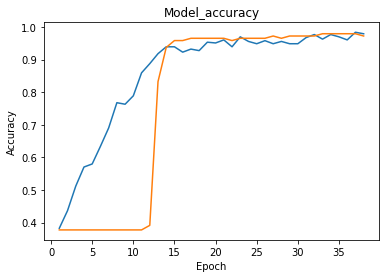

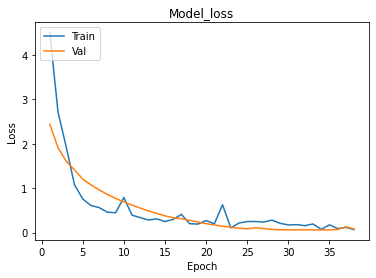

In [178]:
plot_lc(history,38)

In [0]:
def plot_roc(pred,y):
    fpr, tpr, _ = roc_curve(y, pred)
    roc_auc = auc(fpr, tpr)

    plt.figure()
    plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC)')
    plt.legend(loc="lower right")
    plt.show()

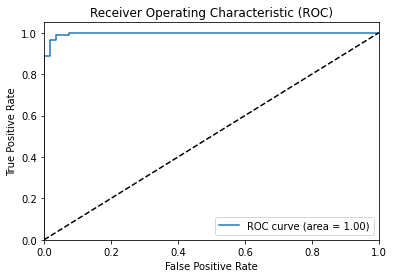

In [179]:
pred = model.predict(X_test)
plot_roc(pred,y_test)